In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import analysis_utils as au
import importlib
import scipy.signal as scisig

### Frequency scan

In [8]:
path = 'D:/Lab Data/lorentz_force/sphere_20250219/20250225_1e-7mbar/'
filestart = '20250125_abcd_'
file_num1 = [41, 53, 60, 80, 105, 130]
file_mid = 'kHz'
file_num2 = [0, 1]
file_end = '.hdf5'

In [9]:
datas = []
PSDs = []
for i in file_num1:
    for j in file_num2:
        print(str(i))
        filename = path + filestart + str(i) +file_mid+str(j) +file_end
        mdict = au.load_data_hdf5(filename)
        metadict = au.load_metadata_hdf5(filename)
        data_volts = np.array(mdict['data']['channel_d'])*metadict['channel_d']['adc2mv']/1000
        datas.append(np.array(data_volts))
        for k in range(6):
            PSD_dv = scisig.welch(data_volts[int(k*5e6):int((k+1)*5e6)], fs=1/metadict['data']['delta_t'], nperseg=5*10**5)
            PSDs.append(PSD_dv[1])
freq = PSD_dv[0]

41
41
53
53
60
60
80
80
105
105
130
130


In [10]:
PSD_avrs = []
for i in range(len(file_num1)):
    PSD_avr = np.mean(PSDs[i*12:(i+1)*12], axis=0)
    PSD_avrs.append(PSD_avr)

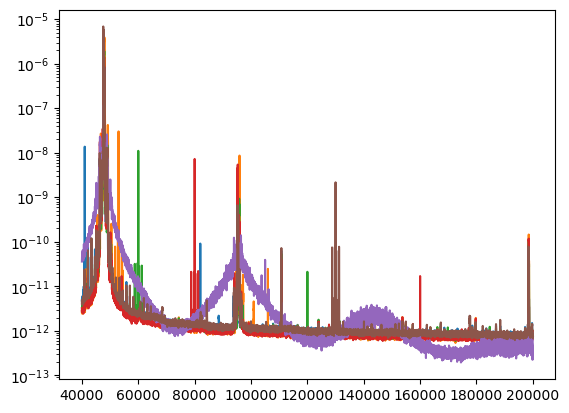

In [14]:
ub = 20000
lb = 4000
for PSD in PSD_avrs:
    plt.plot(freq[lb:ub], PSD[lb:ub])
plt.yscale('log')

In [15]:
# To me it's pretty clear at this voltage (~ 5V into amplifier) it is mostly z-motion because it follows roughly what we would expect from z transfer function

### Look at cancelation

In [16]:
path = 'D:/Lab Data/lorentz_force/sphere_20250219/20250225_1e-7mbar/'
filestart = '20250125_abcd_'
file_num1 = ['nozdrive', 'wzdrive']
file_num2 = ['0', '1', '_20', '_21']
file_end = '.hdf5'

In [17]:
datas = []
PSDs = []
for i in file_num1:
    for j in file_num2:
        filename = path + filestart + i + j +file_end
        mdict = au.load_data_hdf5(filename)
        metadict = au.load_metadata_hdf5(filename)
        data_volts = np.array(mdict['data']['channel_d'])*metadict['channel_d']['adc2mv']/1000
        datas.append(np.array(data_volts))
        for k in range(6):
            PSD_dv = scisig.welch(data_volts[int(k*5e6):int((k+1)*5e6)], fs=1/metadict['data']['delta_t'], nperseg=5*10**5)
            PSDs.append(PSD_dv[1])
freq = PSD_dv[0]

In [18]:
PSD_avrs = []
for i in range(4):
    PSD_avr = np.mean(PSDs[i*12:(i+1)*12], axis=0)
    PSD_avrs.append(PSD_avr)

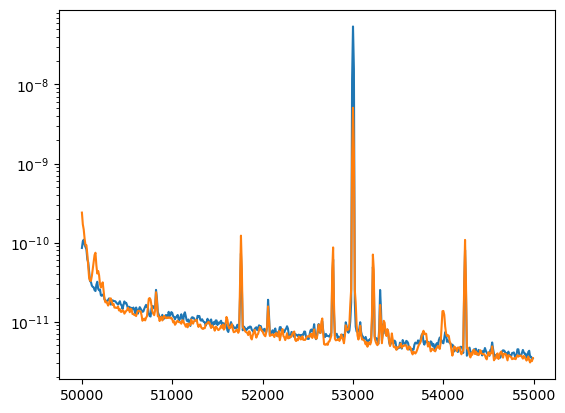

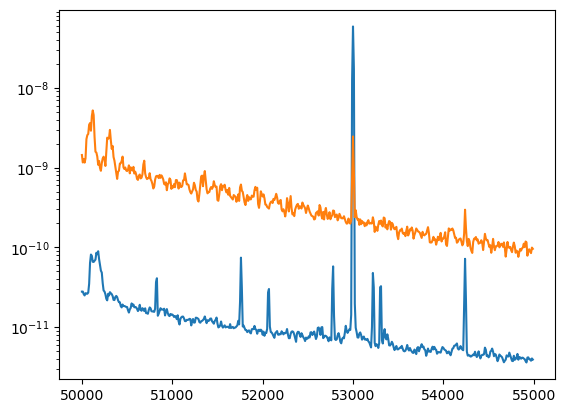

In [23]:
ub = 5500
lb = 5000
plt.plot(freq[lb:ub], PSD_avrs[0][lb:ub])
plt.plot(freq[lb:ub], PSD_avrs[2][lb:ub])
plt.yscale('log')
plt.figure()
plt.plot(freq[lb:ub], PSD_avrs[1][lb:ub])
plt.plot(freq[lb:ub], PSD_avrs[3][lb:ub])
plt.yscale('log')

In [24]:
# Clearly adding drive helps. I think the second one was actually better because I got a good phase but detection fucked up.

### Looking at adding magnet when cancelling with second drive

Start with one of the controls that just had no magnet for 48 seconds after changing phase

In [43]:
path = 'D:/Lab Data/lorentz_force/sphere_20250219/20250225_1e-7mbar/'
filestart = '20250125_abcd_nomagnet_7'
file_num = [0, 1, 2, 3, 4, 5, 6, 7]
file_end = '.hdf5'

In [44]:
datas = []
PSDs = []
for i in file_num:
    filename = path + filestart + str(i) + file_end
    mdict = au.load_data_hdf5(filename)
    metadict = au.load_metadata_hdf5(filename)
    data_volts = np.array(mdict['data']['channel_d'])*metadict['channel_d']['adc2mv']/1000
    datas.append(np.array(data_volts))
    for i in range(6):
        PSD_dv = scisig.welch(data_volts[int(i*5e6):int((i+1)*5e6)], fs=1/metadict['data']['delta_t'], nperseg=5*10**5)
        PSDs.append(PSD_dv[1])
freq = PSD_dv[0]

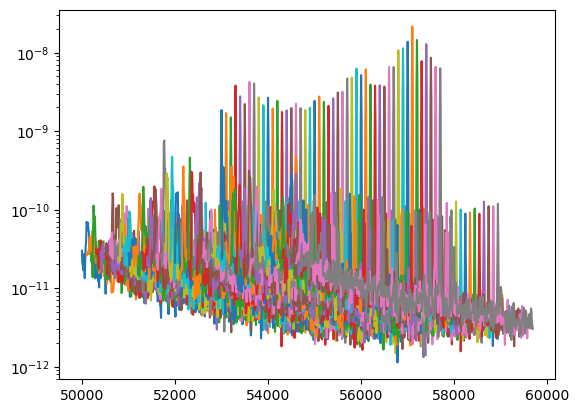

In [45]:
lb = 5000
ub = 5500
for n, PSD in enumerate(PSDs):
    plt.plot(freq[10*n + lb:10*n + ub], PSD[lb:ub])
plt.yscale('log')

In [46]:
max_val = []
random_point = []
for PSD in PSDs:
    max_val.append(PSD[5300])
    random_point.append(PSD[5290])

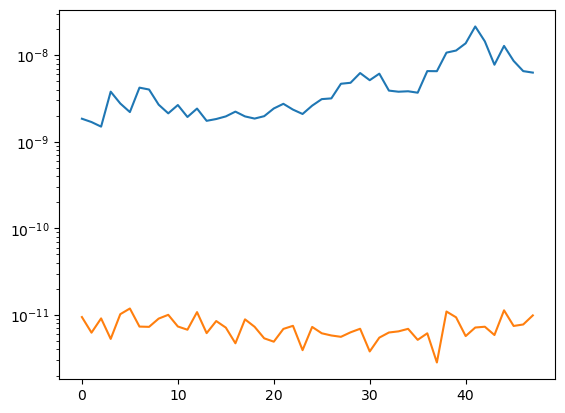

In [47]:
plt.plot(max_val)
plt.plot(random_point)
plt.yscale('log')

Look at one of the magnet ones now

In [88]:
path = 'D:/Lab Data/lorentz_force/sphere_20250219/20250225_1e-7mbar/'
filestart = '20250125_abcd_nomagnet_2'
file_num = [0, 1, 2]
file_end = '.hdf5'

In [89]:
datas = []
PSDs2 = []
for i in file_num:
    filename = path + filestart + str(i) + file_end
    mdict = au.load_data_hdf5(filename)
    metadict = au.load_metadata_hdf5(filename)
    data_volts = np.array(mdict['data']['channel_d'])*metadict['channel_d']['adc2mv']/1000
    datas.append(np.array(data_volts))
    for i in range(6):
        PSD_dv = scisig.welch(data_volts[int(i*5e6):int((i+1)*5e6)], fs=1/metadict['data']['delta_t'], nperseg=5*10**5)
        PSDs2.append(PSD_dv[1])
freq = PSD_dv[0]

In [90]:
path = 'D:/Lab Data/lorentz_force/sphere_20250219/20250225_1e-7mbar/'
filestart = '20250125_abcd_wmagnet_2'
file_num = [0, 1, 2]
file_end = '.hdf5'

In [91]:
datas = []
PSDs3 = []
for i in file_num:
    filename = path + filestart + str(i) + file_end
    mdict = au.load_data_hdf5(filename)
    metadict = au.load_metadata_hdf5(filename)
    data_volts = np.array(mdict['data']['channel_d'])*metadict['channel_d']['adc2mv']/1000
    datas.append(np.array(data_volts))
    for i in range(6):
        PSD_dv = scisig.welch(data_volts[int(i*5e6):int((i+1)*5e6)], fs=1/metadict['data']['delta_t'], nperseg=5*10**5)
        PSDs3.append(PSD_dv[1])
freq = PSD_dv[0]

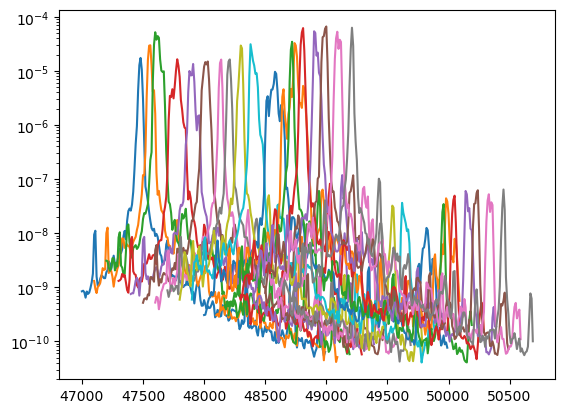

In [92]:
lb = 4700
ub = 4900
for n, PSD in enumerate(PSDs2[:]):
    plt.plot(freq[10*n + lb:10*n + ub], PSD[lb:ub])
    
#for n, PSD in enumerate(PSDs3[:]):
#    plt.plot(freq[10*n+200 + lb:10*n+200 + ub], PSD[lb:ub])
plt.yscale('log')

In [93]:
max_val2 = []
random_point2 = []
for PSD in PSDs2:
    max_val2.append(PSD[5300])
    random_point2.append(PSD[5290])

max_val3 = []
random_point3 = []
for PSD in PSDs3:
    max_val3.append(PSD[5300])
    random_point3.append(PSD[5290])

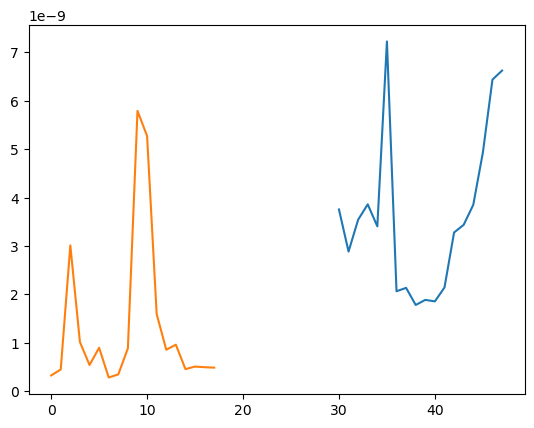

In [94]:
plt.plot(np.arange(30 ,48),max_val3)
plt.plot(np.arange(18), max_val2)

In [96]:
0.1**(1/4)

0.5623413251903491